## Ler o CSV e fazer um tratamento nos seus dados

In [11]:
import pandas as pd

df = pd.read_csv('products1.csv', sep=';') #sep=';' separador

# verifica o tipo de dados
type(df)

# Ler as 5 primeiras linhas
df.head() #df.head(5)

# ler
df.tail() #df.tail(10)

df.head(2)


,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,"18,0",39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,"19,0",17,40,25,0


In [34]:
# LOC OU ILOC

# Lendo com o Loc
df.loc[0] # pegar a primeira linha
df.loc[0:2] # pegar da primeira linha ate a terceira linha
df.loc[[0,2]] # pegar a primeira linha e a terceira
df.loc[0:2, 'ProductID':'CategoryID'] # pegar as 0 a 2 e as colunas de prod a categ.
df.loc[[0,2], ['ProductID','CategoryID']]

# Lendo com iloc
df.iloc[0]
df.iloc[0:2]
df.iloc[[0,2]]
df.iloc[0:2, 0:4]
df.iloc[:5, :4]
df.iloc[15:, 4:]

,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
15,32 - 500 g boxes,"17,45",29,0,10,0
16,20 - 1 kg tins,"39,0",0,0,0,1
17,16 kg pkg.,"62,5",42,0,0,0
18,10 boxes x 12 pieces,"9,2",25,0,5,0
19,30 gift boxes,"81,0",40,0,0,0


In [92]:
# tarefas
df.iloc[:2,0:6:] # linha(0 - 2), coluna(0 - 6, pulando de 1-1)
df.iloc[:2,0::2] # 
df.iloc[:2,0:6:]
df.iloc[:2,::2]
df.iloc[:,::]

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice
0,1,Chai,1,1,10 boxes x 20 bags,18.0
1,2,Chang,1,1,24 - 12 oz bottles,19.0


In [37]:
# qual tipo de informacao eu vou analisar
type(df)

pandas.core.frame.DataFrame

In [41]:
# Quantas linhas e colunas tem no dataset
df.shape #(linhas, colunas)

(20, 10)

In [42]:
# quais colunas(variaveis) devo analisar
df.columns

Index(['ProductID', 'ProductName', 'SupplierID', 'CategoryID',
       'QuantityPerUnit', 'UnitPrice', 'UnitsInStock', 'UnitsOnOrder',
       'ReorderLevel', 'Discontinued'],
      dtype='object')

In [ ]:
# FLUXO PADRAO DE TRABALHO
# ler os dados
# examina as informacoes dos dados
# tratar os dados
# responde as perguntas de analise

In [43]:
# Quais sao os tipos de variaveis vou trabalhar.
# int64, object[str], float, datetime, category, boolean

df.dtypes

ProductID           int64
ProductName        object
SupplierID          int64
CategoryID          int64
QuantityPerUnit    object
UnitPrice          object
UnitsInStock        int64
UnitsOnOrder        int64
ReorderLevel        int64
Discontinued        int64
dtype: object

<AxesSubplot: >

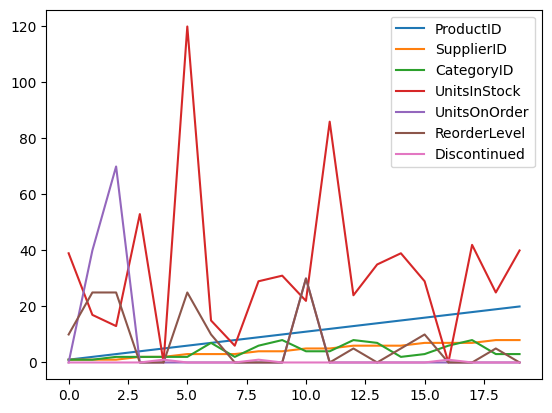

In [46]:
df.plot()

In [48]:
df.head(1)

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,"18,0",39,0,10,0


In [55]:
# tratando a variavel ProductID NaN
df['ProductID'].head()
df['ProductID'].isnull().sum()

0

In [56]:
# tratando a variavel ProductName
df.ProductName.head()

0                            Chai
1                           Chang
2                   Aniseed Syrup
3    Chef Anton's Cajun Seasoning
4          Chef Anton's Gumbo Mix
Name: ProductName, dtype: object

In [57]:
df['SupplierID'].head()

0    1
1    1
2    1
3    2
4    2
Name: SupplierID, dtype: int64

In [64]:
df.CategoryID.head(1)
df.CategoryID = df.CategoryID.astype('category') # converte tipo
df.CategoryID.head(1)

0    1
Name: CategoryID, dtype: category
Categories (7, int64): [1, 2, 3, 4, 6, 7, 8]

<AxesSubplot: >

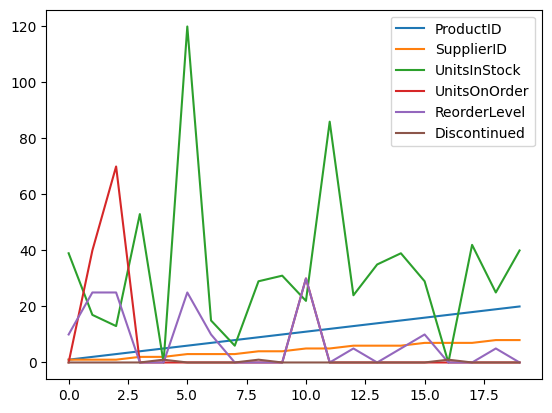

In [65]:
df.plot()

In [66]:
df.QuantityPerUnit.head()

0     10 boxes x 20 bags
1     24 - 12 oz bottles
2    12 - 550 ml bottles
3         48 - 6 oz jars
4               36 boxes
Name: QuantityPerUnit, dtype: object

In [67]:
df.head(1)

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,"18,0",39,0,10,0


In [74]:
df.UnitPrice.head() # 1.2
df.UnitPrice = df.UnitPrice.str.replace(',','.')
df.UnitPrice.head(1)

0    18.0
Name: UnitPrice, dtype: object

In [76]:
# converte para float
#df.UnitPrice = df.UnitPrice.astype('float')
df.UnitPrice = pd.to_numeric(df.UnitPrice)
df.UnitPrice.head(1)

0    18.0
Name: UnitPrice, dtype: float64

In [78]:
df.UnitsInStock.head(1)

0    39
Name: UnitsInStock, dtype: int64

In [80]:
df.UnitsOnOrder.head(5)

0     0
1    40
2    70
3     0
4     0
Name: UnitsOnOrder, dtype: int64

In [81]:
df.head(0)

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued


In [84]:
df.ReorderLevel.tail(3)

17    0
18    5
19    0
Name: ReorderLevel, dtype: int64

In [90]:
df.Discontinued.head(1)
df.Discontinued = pd.Categorical(df.Discontinued)
df.Discontinued.head(1)

0    0
Name: Discontinued, dtype: category
Categories (2, int64): [0, 1]

In [91]:
df.to_csv('produtos.csv')

### Perguntas

1. verifica quantos produtos tem por categorias.
2. verificar qual o total de orders por categorias.


In [99]:
df.head(3)

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0,13,70,25,0


In [122]:
# 1. verifica quantos produtos tem por categorias.

df_subset1 = df[['CategoryID', 'UnitsInStock']]
df_subset1.head(2)

,CategoryID,UnitsInStock
0,1,39
1,1,17


CategoryID
1     56
2    231
3     94
4    108
6     29
7     50
8     97
Name: UnitsInStock, dtype: int64

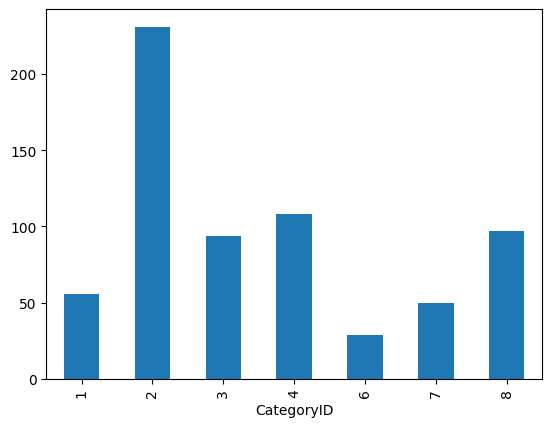

In [132]:
#groupby
# grupo_categoria = df.groupby(['CategoryID', 'ProductName']) # agrupando por duas variaveis
grupo_categoria = df.groupby('CategoryID')

grupo_categoria # mostra a posicao na memoria
type(grupo_categoria) # tipo DataFrameGroupBy

grupo_por_cat = grupo_categoria['UnitsInStock']
type(grupo_por_cat) #tipo SeriesGroupBy

# Quantidade de produtos no estoque por categoria
analise = grupo_por_cat.sum()

analise.plot.bar()

analise



In [123]:
df.head(0)

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued


In [127]:
#2. verificar qual o total de orders por categorias.

df_subset2 = df[['CategoryID', 'UnitsOnOrder']]
df_subset2.head(1)

,CategoryID,UnitsOnOrder
0,1,0


In [136]:
#2. verificar qual o total de orders por categorias.
orders_por_cat = df.groupby('CategoryID')[['UnitsOnOrder']].sum()
orders_por_cat

,UnitsOnOrder
CategoryID,
1,40
2,70
3,0
4,30
6,0
7,0
8,0


In [142]:
df_subset3 = df[['CategoryID', 'UnitPrice','UnitsOnOrder']]
df_subset3 = df_subset3.loc[df_subset3['UnitsOnOrder'] > 0] # pegar sobre condicao
df_subset3

,CategoryID,UnitPrice,UnitsOnOrder
1,1,19.0,40
2,2,10.0,70
10,4,21.0,30
